In [1]:
import os
import glob
import re

from collections import namedtuple

import time
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

import numpy as np

import itertools

In [2]:
log_file_list = glob.glob('../chats/*.log')

In [3]:
print(log_file_list)

['../chats/559066430.log', '../chats/551734269.log', '../chats/562675179.log', '../chats/551240626.log', '../chats/564796691.log', '../chats/552238357.log', '../chats/582902383.log', '../chats/583815634.log']


In [4]:
log_file = log_file_list[-2]

In [5]:
Chat = namedtuple('Chat', 'time id text')

In [6]:
t0 = datetime.strptime('00:00:00','%H:%M:%S')

In [7]:
chat_history = list()

with open(log_file, 'r') as file:
    
    count = 0
    for chat in file:
#     chat = next(file).strip()
#         print(chat.strip())
        chat_time = re.search('\[.*?\]', chat)[0]
        user_id_match = re.search('<.*?>', chat)
        user_id = user_id_match[0]
        start_of_chat = user_id_match.span()[-1]
        text = chat[start_of_chat:].strip()
        
        dt = datetime.strptime(chat_time,'[%H:%M:%S]') - t0
#         print(dt.total_seconds())
        
        chat_tuple = Chat(dt.total_seconds(), user_id[1:-1], text)

#         print('{}'.format(chat_tuple))
        chat_history.append(chat_tuple)
        

In [8]:
chat_time_list = [getattr(chat, 'time') for chat in chat_history]

In [9]:
max_min = np.int(np.ceil(max(chat_time_list)/60) + 1)

In [10]:
def express_bins_as_time_range(bins, index_list):
    
    time_range_list = list()
    
    for index in index_list:
        begin = timedelta(seconds=int(bins[index]))
        end = timedelta(seconds=int(bins[index+1]))
        print('[{} ~ {}]'.format(begin, end))
        time_range_list.append((begin, end))
        
    return time_range_list
    

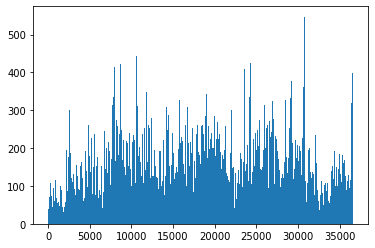

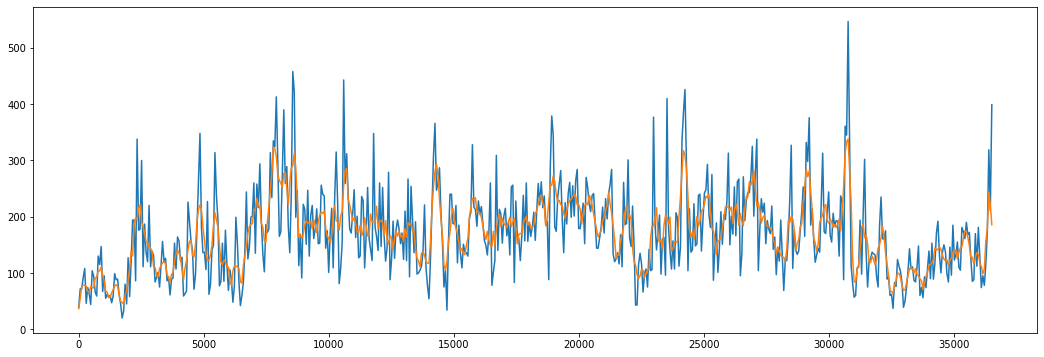

0.37937806873976126
51.20804362456574
[143, 177, 197, 384, 393, 514, 610]
[2:22:41 ~ 2:23:41]
[2:56:36 ~ 2:57:36]
[3:16:33 ~ 3:17:32]
[6:23:02 ~ 6:24:02]
[6:32:01 ~ 6:33:01]
[8:32:41 ~ 8:33:41]
[10:08:26 ~ 10:09:26]


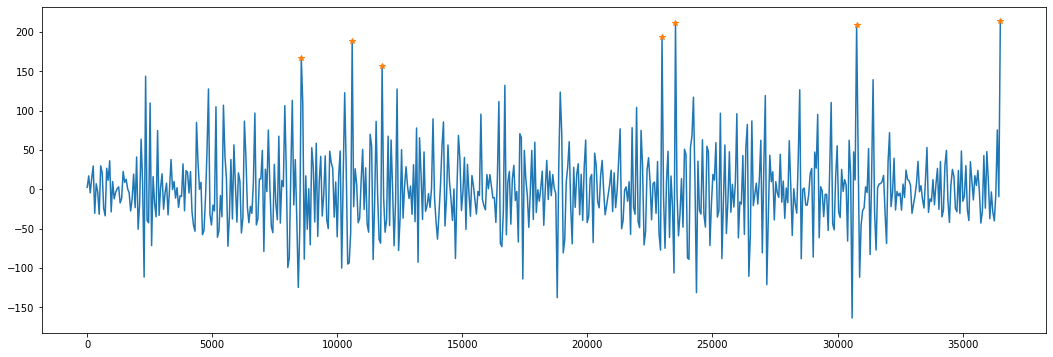

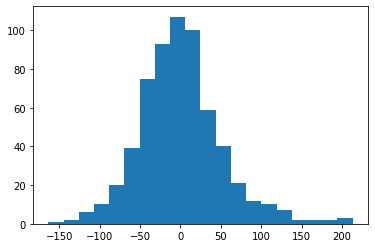

In [11]:
plt.figure()
histogram, bins, _ = plt.hist(chat_time_list, bins=max_min)
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram)
historgram_avg = np.convolve(histogram, np.ones(5)/5, 'same')
plt.plot(bins[:-1], historgram_avg)
plt.show()

histogram_delta = histogram - historgram_avg

print(np.mean(histogram_delta))

print(np.std(histogram_delta))

outlier_idx = np.argwhere(histogram_delta > np.mean(histogram_delta) + 3 * np.std(histogram_delta))
outlier_idx = list(itertools.chain.from_iterable(outlier_idx))

print(outlier_idx)
express_bins_as_time_range(bins, outlier_idx)

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram_delta)
plt.plot(bins[:-1][outlier_idx], histogram_delta[outlier_idx], '*')
plt.show()



plt.figure()
_, _, _ = plt.hist(histogram_delta, bins=20)
plt.show()

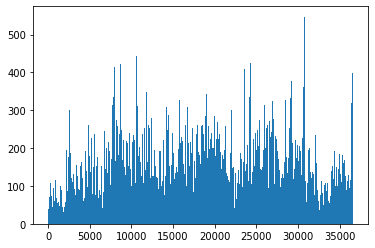

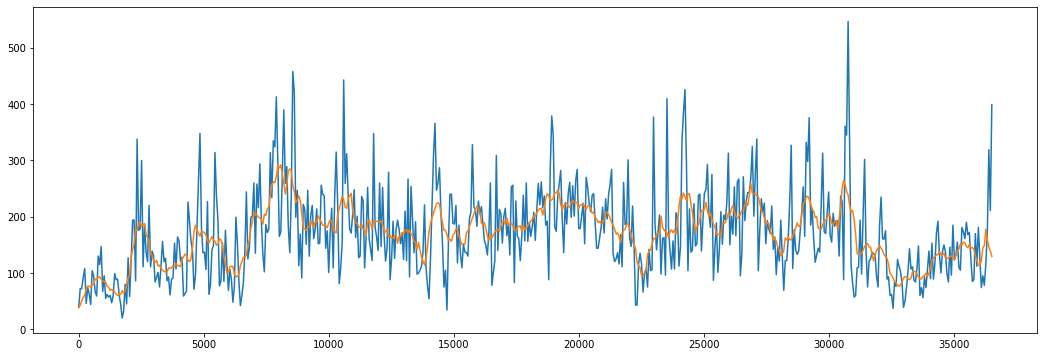

0.7963993453355056
62.012331703226295
[143, 177, 384, 393, 405, 514, 610]
[2:22:41 ~ 2:23:41]
[2:56:36 ~ 2:57:36]
[6:23:02 ~ 6:24:02]
[6:32:01 ~ 6:33:01]
[6:43:59 ~ 6:44:59]
[8:32:41 ~ 8:33:41]
[10:08:26 ~ 10:09:26]


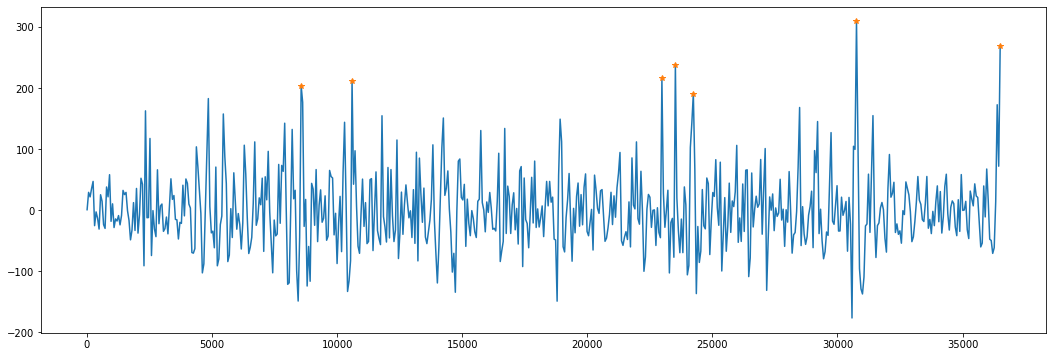

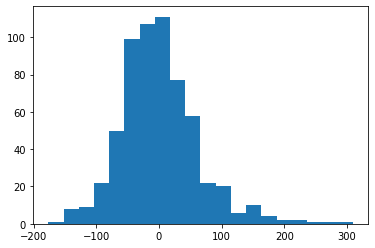

In [12]:
plt.figure()
histogram, bins, _ = plt.hist(chat_time_list, bins=max_min)
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram)
historgram_avg = np.convolve(histogram, np.ones(10)/10, 'same')
plt.plot(bins[:-1], historgram_avg)
plt.show()

histogram_delta = histogram - historgram_avg

print(np.mean(histogram_delta))

print(np.std(histogram_delta))

outlier_idx = np.argwhere(histogram_delta > np.mean(histogram_delta) + 3 * np.std(histogram_delta))
outlier_idx = list(itertools.chain.from_iterable(outlier_idx))

print(outlier_idx)
express_bins_as_time_range(bins, outlier_idx)

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram_delta)
plt.plot(bins[:-1][outlier_idx], histogram_delta[outlier_idx], '*')
plt.show()



plt.figure()
_, _, _ = plt.hist(histogram_delta, bins=20)
plt.show()

In [13]:
print(datetime.now().strftime("%H-%M-%S"))

17-10-12
